In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

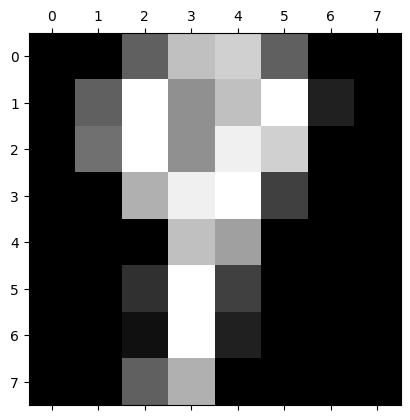

In [3]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[69]) #index est le numéro de l’image
plt.show()

In [285]:
X = digits.data
y = digits.target

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)


score = []
C_list = [1,5,10,15,20,25,30,35,40,45,50,55,60]

from sklearn.neural_network import MLPClassifier
for C in C_list:
    clf1 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0)
    clf1.fit(X_train, y_train)
    score.append(clf1.score(X_test, y_test))

plt.plot(C_list, score)
plt.grid()
plt.xlabel('C')
plt.ylabel('Score')
plt.show()


In [89]:

from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)

from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(hidden_layer_sizes=15, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0)
clf1.fit(X_train, y_train)

print(clf1.score(X_test, y_test))


0.975925925925926


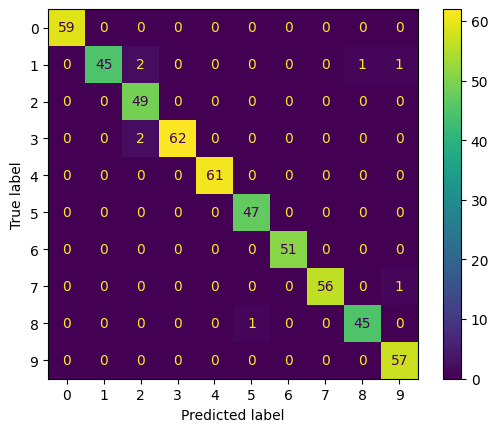

In [18]:

y_pred_test = clf1.predict(X_test)
#matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

In [24]:
from sklearn.model_selection import validation_curve
import numpy as np

C = np.array([1,2,3,4,5,8,10,15,20,25,30,35,40])
clft = MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
train_scores, validation_scores = validation_curve(
        clft, 
        X_train, y_train, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", n_jobs=2)


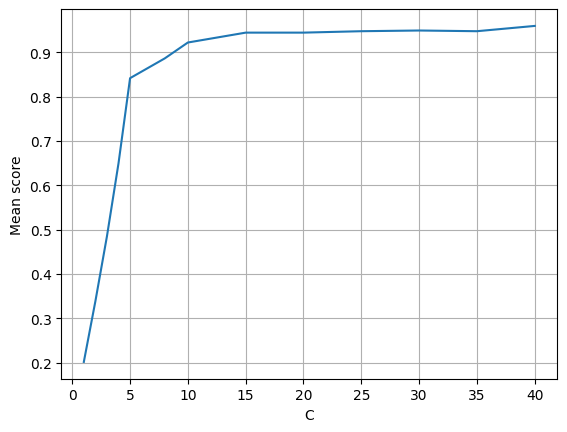

In [258]:
plt.plot(C, [np.mean(score) for score in validation_scores])
plt.grid()
plt.xlabel('C')
plt.ylabel('Mean score')
plt.show()

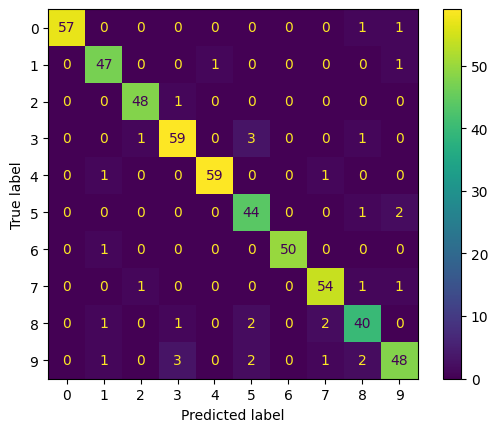

In [ ]:
clft = MLPClassifier(hidden_layer_sizes=15, activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
clft.fit(X_train, y_train)
y_pred_test = clft.predict(X_test)
#matrice de confusion
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test)).plot()

In [272]:
for i in range(100):
    clft.predict(X_test)

3


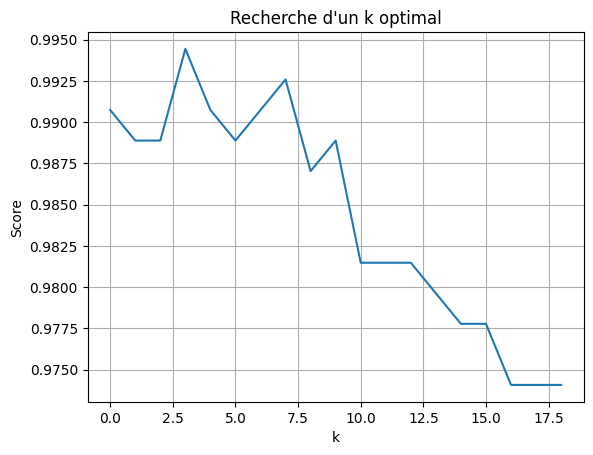

In [261]:
from sklearn.neighbors import KNeighborsClassifier

scores = []
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=1)

for k in range(1,20):
    k_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    k_NN.fit(X_train, y_train)
    scores.append(k_NN.score(X_test, y_test))

print(scores.index(max(scores)))
plt.plot(scores)
plt.grid()
plt.title('Recherche d\'un k optimal')
plt.xlabel('k')
plt.ylabel('Score')
plt.show()

In [262]:
k_NN = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
k_NN.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', n_neighbors=3)

In [273]:
for i in range(100):
    k_NN.predict(X_test)

In [130]:
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=0)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=0) < threshold))

    return y_masked.filled(-1)

def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=0)
    y_top2 = np.sort(y, axis=0)[-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[0] - y_top2[1]) < threshold))

    return y_masked.filled(-1)

In [199]:
clft = MLPClassifier(hidden_layer_sizes=20,activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
clft.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0, batch_size=1, early_stopping=True,
              hidden_layer_sizes=20, learning_rate='adaptive',
              validation_fraction=0.2)

best threshold = 0.18


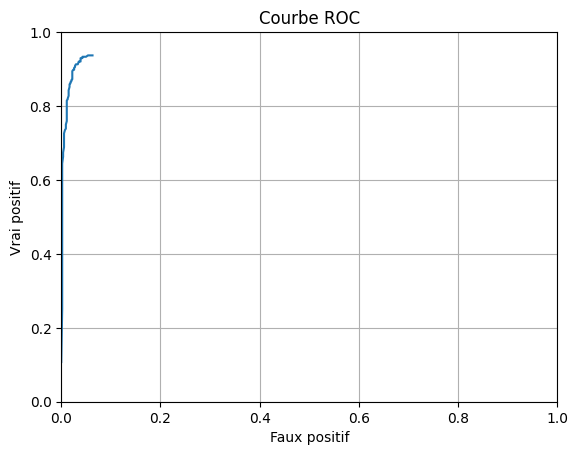

In [274]:
probas = clft.predict_proba(X_test)

vrai_posi = []
faux_posi = []
test = []

for i in np.arange(0,1,10e-3):
    rejet = 0
    bien_classe = 0
    mal_classe = 0
    for j,proba in enumerate(probas):
        test = argmax_top2_reject_threshold(proba, i)
        if test == -1 :
            rejet += 1
            continue
        if test == y_test[j] : 
            bien_classe += 1
        else :
            mal_classe +=1
    vrai_posi.append(bien_classe/(len(probas)))
    faux_posi.append(mal_classe/(len(probas)))

dist = []
for i in range(len(vrai_posi)):
    dist.append(np.sqrt((1-vrai_posi[i])*(1-vrai_posi[i]) + (faux_posi[i])*(faux_posi[i])))

best_threshold = dist.index(min(dist)) * 10e-3

print(f'best threshold = {best_threshold}')
plt.plot(faux_posi, vrai_posi)
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid()
plt.title('Courbe ROC')
plt.xlabel('Faux positif')
plt.ylabel('Vrai positif')
plt.show()


In [231]:
three_NN = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
three_NN.fit(X_train,y_train)
clf = MLPClassifier(hidden_layer_sizes=44,activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)
clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0, batch_size=1, early_stopping=True,
              hidden_layer_sizes=44, learning_rate='adaptive',
              validation_fraction=0.2)

In [278]:
clf_probas = clf.predict_proba(X_test)
threshold = 0.18
y_predict = []
y_predict_casc_1 = []
bien_classe = 0
rejet = 0
for i,proba in enumerate(clf_probas):
    predict = argmax_top2_reject_threshold(proba, threshold)
    y_predict_casc_1.append(argmax_top2_reject_threshold(proba, 0))
    if(predict == -1):
        rejet+=1
        predict = three_NN.predict(X_test)[i]
    y_predict.append(predict)
    if(predict == y_test[i]):
        bien_classe += 1

print(f"pour threshold = {threshold}\nbien classés/classés : {bien_classe}/{len(y_test)}({bien_classe/(len(y_test))}) avec {rejet} rejet")



pour threshold = 0.18
bien classés/classés : 526/540(0.9740740740740741) avec 11 rejet


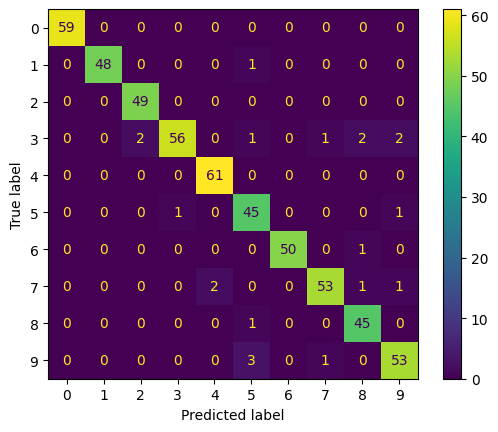

In [283]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
x = ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict_casc_1)).plot()


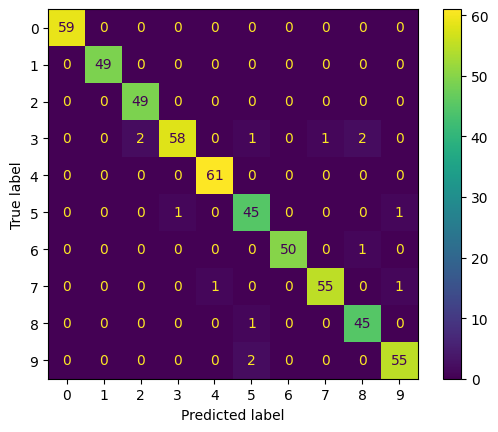

In [284]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()